# Classificação de tweets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import svm
from statistics import mean


from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from collections import Counter
from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Metodologia utilizada neste notebook

Neste notebook, está o passo a passo dos testes realizados com classificadores na base de tweets coletados relacionados aos candidatos à presidência da República e classificados utilizando o CLAM.


## Limpeza do corpus

Método para remoção de emojis dos tweets e importação do arquivo de stopwords.

In [4]:
emojistring = '''😀 😁 😂 🤣 😃 😄 😅 😆 😉 😊 😋 😎 😍 😘 😗 😙 😚 ☺️ 🙂 🤗 🤩 🤔 🤨 😐 😑 😶 🙄 😏 😣 😥 😮 🤐 😯 😪 😫 😴 😌 😛 😜 😝 🤤 😒 😓 😔 😕 🙃 🤑 😲 ☹️ 🙁 😖 😞 😟 😤 😢 😭 😦 😧 😨 😩 🤯 😬 😰 😱 😳 🤪 😵 😡 😠 🤬 😷 🤒 🤕 🤢 🤮 🤧 😇 🤠 🤡 🤥 🤫 🤭 🧐 🤓 😈 👿 👹 👺 💀 👻 👽 🤖 💩 😺 😸 😹 😻 😼 😽 🙀 😿 😾
👶 👦 👧 👨 👩 👴 👵 👨‍⚕️ 👩‍⚕️ 👨‍🎓 👩‍🎓 👨‍⚖️ 👩‍⚖️ 👨‍🌾 👩‍🌾 👨‍🍳 👩‍🍳 👨‍🔧 👩‍🔧 👨‍🏭 👩‍🏭 👨‍💼 👩‍💼 👨‍🔬 👩‍🔬 👨‍💻 👩‍💻 👨‍🎤 👩‍🎤 👨‍🎨 👩‍🎨 👨‍✈️ 👩‍✈️ 👨‍🚀 👩‍🚀 👨‍🚒 👩‍🚒 👮 👮‍♂️ 👮‍♀️ 🕵 🕵️‍♂️ 🕵️‍♀️ 💂 💂‍♂️ 💂‍♀️ 👷 👷‍♂️ 👷‍♀️ 🤴 👸 👳 👳‍♂️ 👳‍♀️ 👲 🧕 🧔 👱 👱‍♂️ 👱‍♀️ 🤵 👰 🤰 🤱 👼 🎅 🤶 🧙‍♀️ 🧙‍♂️ 🧚‍♀️ 🧚‍♂️ 🧛‍♀️ 🧛‍♂️ 🧜‍♀️ 🧜‍♂️ 🧝‍♀️ 🧝‍♂️ 🧞‍♀️ 🧞‍♂️ 🧟‍♀️ 🧟‍♂️ 🙍 🙍‍♂️ 🙍‍♀️ 🙎 🙎‍♂️ 🙎‍♀️ 🙅 🙅‍♂️ 🙅‍♀️ 🙆 🙆‍♂️ 🙆‍♀️ 💁 💁‍♂️ 💁‍♀️ 🙋 🙋‍♂️ 🙋‍♀️ 🙇 🙇‍♂️ 🙇‍♀️ 🤦 🤦‍♂️ 🤦‍♀️ 🤷 🤷‍♂️ 🤷‍♀️ 💆 💆‍♂️ 💆‍♀️ 💇 💇‍♂️ 💇‍♀️ 🚶 🚶‍♂️ 🚶‍♀️ 🏃 🏃‍♂️ 🏃‍♀️ 💃 🕺 👯 👯‍♂️ 👯‍♀️ 🧖‍♀️ 🧖‍♂️ 🕴 🗣 👤 👥 👫 👬 👭 💏 👨‍❤️‍💋‍👨 👩‍❤️‍💋‍👩 💑 👨‍❤️‍👨 👩‍❤️‍👩 👪 👨‍👩‍👦 👨‍👩‍👧 👨‍👩‍👧‍👦 👨‍👩‍👦‍👦 👨‍👩‍👧‍👧 👨‍👨‍👦 👨‍👨‍👧 👨‍👨‍👧‍👦 👨‍👨‍👦‍👦 👨‍👨‍👧‍👧 👩‍👩‍👦 👩‍👩‍👧 👩‍👩‍👧‍👦 👩‍👩‍👦‍👦 👩‍👩‍👧‍👧 👨‍👦 👨‍👦‍👦 👨‍👧 👨‍👧‍👦 👨‍👧‍👧 👩‍👦 👩‍👦‍👦 👩‍👧 👩‍👧‍👦 👩‍👧‍👧 🤳 💪 👈 👉 ☝️ 👆 🖕 👇 ✌️ 🤞 🖖 🤘 🖐 ✋ 👌 👍 👎 ✊ 👊 🤛 🤜 🤚 👋 🤟 ✍️ 👏 👐 🙌 🤲 🙏 🤝 💅 👂 👃 👣 👀 👁 🧠 👅 👄 💋

👓 🕶 👔 👕 👖 🧣 🧤 🧥 🧦 👗 👘 👙 👚 👛 👜 👝 🎒 👞 👟 👠 👡 👢 👑 👒 🎩 🎓 🧢 ⛑ 💄 💍 🌂 💼
👐🏻 🙌🏻 👏🏻 🙏🏻 👍🏻 👎🏻 👊🏻 ✊🏻 🤛🏻 🤜🏻 🤞🏻 ✌🏻 🤘🏻 👌🏻 👈🏻 👉🏻 👆🏻 👇🏻 ☝🏻 ✋🏻 🤚🏻 🖐🏻 🖖🏻 👋🏻 🤙🏻 💪🏻 🖕🏻 ✍🏻 🤳🏻 💅🏻 👂🏻 👃🏻 👶🏻 👦🏻 👧🏻 👨🏻 👩🏻 👱🏻‍♀️ 👱🏻 👴🏻 👵🏻 👲🏻 👳🏻‍♀️ 👳🏻 👮🏻‍♀️ 👮🏻 👷🏻‍♀️ 👷🏻 💂🏻‍♀️ 💂🏻 🕵🏻‍♀️ 🕵🏻 👩🏻‍⚕️ 👨🏻‍⚕️ 👩🏻‍🌾 👨🏻‍🌾 👩🏻‍🍳 👨🏻‍🍳 👩🏻‍🎓 👨🏻‍🎓 👩🏻‍🎤 👨🏻‍🎤 👩🏻‍🏫 👨🏻‍🏫 👩🏻‍🏭 👨🏻‍🏭 👩🏻‍💻 👨🏻‍💻 👩🏻‍💼 👨🏻‍💼 👩🏻‍🔧 👨🏻‍🔧 👩🏻‍🔬 👨🏻‍🔬 👩🏻‍🎨 👨🏻‍🎨 👩🏻‍🚒 👨🏻‍🚒 👩🏻‍✈️ 👨🏻‍✈️ 👩🏻‍🚀 👨🏻‍🚀 👩🏻‍⚖️ 👨🏻‍⚖️ 🤶🏻 🎅🏻 👸🏻 🤴🏻 👰🏻 🤵🏻 👼🏻 🤰🏻 🙇🏻‍♀️ 🙇🏻 💁🏻 💁🏻‍♂️ 🙅🏻 🙅🏻‍♂️ 🙆🏻 🙆🏻‍♂️ 🙋🏻 🙋🏻‍♂️ 🤦🏻‍♀️ 🤦🏻‍♂️ 🤷🏻‍♀️ 🤷🏻‍♂️ 🙎🏻 🙎🏻‍♂️ 🙍🏻 🙍🏻‍♂️ 💇🏻 💇🏻‍♂️ 💆🏻 💆🏻‍♂️ 🕴🏻 💃🏻 🕺🏻 🚶🏻‍♀️ 🚶🏻 🏃🏻‍♀️ 🏃🏻 🏋🏻‍♀️ 🏋🏻 🤸🏻‍♀️ 🤸🏻‍♂️ ⛹🏻‍♀️ ⛹🏻 🤾🏻‍♀️ 🤾🏻‍♂️ 🏌🏻‍♀️ 🏌🏻 🏄🏻‍♀️ 🏄🏻 🏊🏻‍♀️ 🏊🏻 🤽🏻‍♀️ 🤽🏻‍♂️ 🚣🏻‍♀️ 🚣🏻 🏇🏻 🚴🏻‍♀️ 🚴🏻 🚵🏻‍♀️ 🚵🏻 🤹🏻‍♀️ 🤹🏻‍♂️ 🛀🏻

👐🏼 🙌🏼 👏🏼 🙏🏼 👍🏼 👎🏼 👊🏼 ✊🏼 🤛🏼 🤜🏼 🤞🏼 ✌🏼 🤘🏼 👌🏼 👈🏼 👉🏼 👆🏼 👇🏼 ☝🏼 ✋🏼 🤚🏼 🖐🏼 🖖🏼 👋🏼 🤙🏼 💪🏼 🖕🏼 ✍🏼 🤳🏼 💅🏼 👂🏼 👃🏼 👶🏼 👦🏼 👧🏼 👨🏼 👩🏼 👱🏼‍♀️ 👱🏼 👴🏼 👵🏼 👲🏼 👳🏼‍♀️ 👳🏼 👮🏼‍♀️ 👮🏼 👷🏼‍♀️ 👷🏼 💂🏼‍♀️ 💂🏼 🕵🏼‍♀️ 🕵🏼 👩🏼‍⚕️ 👨🏼‍⚕️ 👩🏼‍🌾 👨🏼‍🌾 👩🏼‍🍳 👨🏼‍🍳 👩🏼‍🎓 👨🏼‍🎓 👩🏼‍🎤 👨🏼‍🎤 👩🏼‍🏫 👨🏼‍🏫 👩🏼‍🏭 👨🏼‍🏭 👩🏼‍💻 👨🏼‍💻 👩🏼‍💼 👨🏼‍💼 👩🏼‍🔧 👨🏼‍🔧 👩🏼‍🔬 👨🏼‍🔬 👩🏼‍🎨 👨🏼‍🎨 👩🏼‍🚒 👨🏼‍🚒 👩🏼‍✈️ 👨🏼‍✈️ 👩🏼‍🚀 👨🏼‍🚀 👩🏼‍⚖️ 👨🏼‍⚖️ 🤶🏼 🎅🏼 👸🏼 🤴🏼 👰🏼 🤵🏼 👼🏼 🤰🏼 🙇🏼‍♀️ 🙇🏼 💁🏼 💁🏼‍♂️ 🙅🏼 🙅🏼‍♂️ 🙆🏼 🙆🏼‍♂️ 🙋🏼 🙋🏼‍♂️ 🤦🏼‍♀️ 🤦🏼‍♂️ 🤷🏼‍♀️ 🤷🏼‍♂️ 🙎🏼 🙎🏼‍♂️ 🙍🏼 🙍🏼‍♂️ 💇🏼 💇🏼‍♂️ 💆🏼 💆🏼‍♂️ 🕴🏼 💃🏼 🕺🏼 🚶🏼‍♀️ 🚶🏼 🏃🏼‍♀️ 🏃🏼 🏋🏼‍♀️ 🏋🏼 🤸🏼‍♀️ 🤸🏼‍♂️ ⛹🏼‍♀️ ⛹🏼 🤾🏼‍♀️ 🤾🏼‍♂️ 🏌🏼‍♀️ 🏌🏼 🏄🏼‍♀️ 🏄🏼 🏊🏼‍♀️ 🏊🏼 🤽🏼‍♀️ 🤽🏼‍♂️ 🚣🏼‍♀️ 🚣🏼 🏇🏼 🚴🏼‍♀️ 🚴🏼 🚵🏼‍♀️ 🚵🏻 🤹🏼‍♀️ 🤹🏼‍♂️ 🛀🏼

👐🏽 🙌🏽 👏🏽 🙏🏽 👍🏽 👎🏽 👊🏽 ✊🏽 🤛🏽 🤜🏽 🤞🏽 ✌🏽 🤘🏽 👌🏽 👈🏽 👉🏽 👆🏽 👇🏽 ☝🏽 ✋🏽 🤚🏽 🖐🏽 🖖🏽 👋🏽 🤙🏽 💪🏽 🖕🏽 ✍🏽 🤳🏽 💅🏽 👂🏽 👃🏽 👶🏽 👦🏽 👧🏽 👨🏽 👩🏽 👱🏽‍♀️ 👱🏽 👴🏽 👵🏽 👲🏽 👳🏽‍♀️ 👳🏽 👮🏽‍♀️ 👮🏽 👷🏽‍♀️ 👷🏽 💂🏽‍♀️ 💂🏽 🕵🏽‍♀️ 🕵🏽 👩🏽‍⚕️ 👨🏽‍⚕️ 👩🏽‍🌾 👨🏽‍🌾 👩🏽‍🍳 👨🏽‍🍳 👩🏽‍🎓 👨🏽‍🎓 👩🏽‍🎤 👨🏽‍🎤 👩🏽‍🏫 👨🏽‍🏫 👩🏽‍🏭 👨🏽‍🏭 👩🏽‍💻 👨🏽‍💻 👩🏽‍💼 👨🏽‍💼 👩🏽‍🔧 👨🏽‍🔧 👩🏽‍🔬 👨🏽‍🔬 👩🏽‍🎨 👨🏽‍🎨 👩🏽‍🚒 👨🏽‍🚒 👩🏽‍✈️ 👨🏽‍✈️ 👩🏽‍🚀 👨🏽‍🚀 👩🏽‍⚖️ 👨🏽‍⚖️ 🤶🏽 🎅🏽 👸🏽 🤴🏽 👰🏽 🤵🏽 👼🏽 🤰🏽 🙇🏽‍♀️ 🙇🏽 💁🏽 💁🏽‍♂️ 🙅🏽 🙅🏽‍♂️ 🙆🏽 🙆🏽‍♂️ 🙋🏽 🙋🏽‍♂️ 🤦🏽‍♀️ 🤦🏽‍♂️ 🤷🏽‍♀️ 🤷🏽‍♂️ 🙎🏽 🙎🏽‍♂️ 🙍🏽 🙍🏽‍♂️ 💇🏽 💇🏽‍♂️ 💆🏽 💆🏽‍♂️ 🕴🏼 💃🏽 🕺🏽 🚶🏽‍♀️ 🚶🏽 🏃🏽‍♀️ 🏃🏽 🏋🏽‍♀️ 🏋🏽 🤸🏽‍♀️ 🤸🏽‍♂️ ⛹🏽‍♀️ ⛹🏽 🤾🏽‍♀️ 🤾🏽‍♂️ 🏌🏽‍♀️ 🏌🏽 🏄🏽‍♀️ 🏄🏽 🏊🏽‍♀️ 🏊🏽 🤽🏽‍♀️ 🤽🏽‍♂️ 🚣🏽‍♀️ 🚣🏽 🏇🏽 🚴🏽‍♀️ 🚴🏽 🚵🏽‍♀️ 🚵🏽 🤹🏽‍♀️ 🤹🏽‍♂️ 🛀🏽

👐🏾 🙌🏾 👏🏾 🙏🏾 👍🏾 👎🏾 👊🏾 ✊🏾 🤛🏾 🤜🏾 🤞🏾 ✌🏾 🤘🏾 👌🏾 👈🏾 👉🏾 👆🏾 👇🏾 ☝🏾 ✋🏾 🤚🏾 🖐🏾 🖖🏾 👋🏾 🤙🏾 💪🏾 🖕🏾 ✍🏾 🤳🏾 💅🏾 👂🏾 👃🏾 👶🏾 👦🏾 👧🏾 👨🏾 👩🏾 👱🏾‍♀️ 👱🏾 👴🏾 👵🏾 👲🏾 👳🏾‍♀️ 👳🏾 👮🏾‍♀️ 👮🏾 👷🏾‍♀️ 👷🏾 💂🏾‍♀️ 💂🏾 🕵🏾‍♀️ 🕵🏾 👩🏾‍⚕️ 👨🏾‍⚕️ 👩🏾‍🌾 👨🏾‍🌾 👩🏾‍🍳 👨🏾‍🍳 👩🏾‍🎓 👨🏾‍🎓 👩🏾‍🎤 👨🏾‍🎤 👩🏾‍🏫 👨🏾‍🏫 👩🏾‍🏭 👨🏾‍🏭 👩🏾‍💻 👨🏾‍💻 👩🏾‍💼 👨🏾‍💼 👩🏾‍🔧 👨🏾‍🔧 👩🏾‍🔬 👨🏾‍🔬 👩🏾‍🎨 👨🏾‍🎨 👩🏾‍🚒 👨🏾‍🚒 👩🏾‍✈️ 👨🏾‍✈️ 👩🏾‍🚀 👨🏾‍🚀 👩🏾‍⚖️ 👨🏾‍⚖️ 🤶🏾 🎅🏾 👸🏾 🤴🏾 👰🏾 🤵🏾 👼🏾 🤰🏾 🙇🏾‍♀️ 🙇🏾 💁🏾 💁🏾‍♂️ 🙅🏾 🙅🏾‍♂️ 🙆🏾 🙆🏾‍♂️ 🙋🏾 🙋🏾‍♂️ 🤦🏾‍♀️ 🤦🏾‍♂️ 🤷🏾‍♀️ 🤷🏾‍♂️ 🙎🏾 🙎🏾‍♂️ 🙍🏾 🙍🏾‍♂️ 💇🏾 💇🏾‍♂️ 💆🏾 💆🏾‍♂️ 🕴🏾 💃🏾 🕺🏾 🚶🏾‍♀️ 🚶🏾 🏃🏾‍♀️ 🏃🏾 🏋🏾‍♀️ 🏋🏾 🤸🏾‍♀️ 🤸🏾‍♂️ ⛹🏾‍♀️ ⛹🏾 🤾🏾‍♀️ 🤾🏾‍♂️ 🏌🏾‍♀️ 🏌🏾 🏄🏾‍♀️ 🏄🏾 🏊🏾‍♀️ 🏊🏾 🤽🏾‍♀️ 🤽🏾‍♂️ 🚣🏾‍♀️ 🚣🏾 🏇🏾 🚴🏾‍♀️ 🚴🏾 🚵🏾‍♀️ 🚵🏾 🤹🏾‍♀️ 🤹🏾‍♂️ 🛀🏾

👐🏿 🙌🏿 👏🏿 🙏🏿 👍🏿 👎🏿 👊🏿 ✊🏿 🤛🏿 🤜🏿 🤞🏿 ✌🏿 🤘🏿 👌🏿 👈🏿 👉🏿 👆🏿 👇🏿 ☝🏿 ✋🏿 🤚🏿 🖐🏿 🖖🏿 👋🏿 🤙🏿 💪🏿 🖕🏿 ✍🏿 🤳🏿 💅🏿 👂🏿 👃🏿 👶🏿 👦🏿 👧🏿 👨🏿 👩🏿 👱🏿‍♀️ 👱🏿 👴🏿 👵🏿 👲🏿 👳🏿‍♀️ 👳🏿 👮🏿‍♀️ 👮🏿 👷🏿‍♀️ 👷🏿 💂🏿‍♀️ 💂🏿 🕵🏿‍♀️ 🕵🏿 👩🏿‍⚕️ 👨🏿‍⚕️ 👩🏿‍🌾 👨🏿‍🌾 👩🏿‍🍳 👨🏿‍🍳 👩🏿‍🎓 👨🏿‍🎓 👩🏿‍🎤 👨🏿‍🎤 👩🏿‍🏫 👨🏿‍🏫 👩🏿‍🏭 👨🏿‍🏭 👩🏿‍💻 👨🏿‍💻 👩🏿‍💼 👨🏿‍💼 👩🏿‍🔧 👨🏿‍🔧 👩🏿‍🔬 👨🏿‍🔬 👩🏿‍🎨 👨🏿‍🎨 👩🏿‍🚒 👨🏿‍🚒 👩🏿‍✈️ 👨🏿‍✈️ 👩🏿‍🚀 👨🏿‍🚀 👩🏿‍⚖️ 👨🏿‍⚖️ 🤶🏿 🎅🏿 👸🏿 🤴🏿 👰🏿 🤵🏿 👼🏿 🤰🏿 🙇🏿‍♀️ 🙇🏿 💁🏿 💁🏿‍♂️ 🙅🏿 🙅🏿‍♂️ 🙆🏿 🙆🏿‍♂️ 🙋🏿 🙋🏿‍♂️ 🤦🏿‍♀️ 🤦🏿‍♂️ 🤷🏿‍♀️ 🤷🏿‍♂️ 🙎🏿 🙎🏿‍♂️ 🙍🏿 🙍🏿‍♂️ 💇🏿 💇🏿‍♂️ 💆🏿 💆🏿‍♂️ 🕴🏿 💃🏿 🕺🏿 🚶🏿‍♀️ 🚶🏿 🏃🏿‍♀️ 🏃🏿 🏋🏿‍♀️ 🏋🏿 🤸🏿‍♀️ 🤸🏿‍♂️ ⛹🏿‍♀️ ⛹🏿 🤾🏿‍♀️ 🤾🏿‍♂️ 🏌🏿‍♀️ 🏌🏿 🏄🏿‍♀️ 🏄🏿 🏊🏿‍♀️ 🏊🏿 🤽🏿‍♀️ 🤽🏿‍♂️ 🚣🏿‍♀️ 🚣🏿 🏇🏿 🚴🏿‍♀️ 🚴🏿 🚵🏿‍♀️ 🚵🏿 🤹🏿‍♀️ 🤹🏿‍♂️ 🛀🏿

🐶 🐱 🐭 🐹 🐰 🦊 🐻 🐼 🐨 🐯 🦁 🐮 🐷 🐽 🐸 🐵 🙊 🙉 🙊 🐒 🐔 🐧 🐦 🐤 🐣 🐥 🦆 🦅 🦉 🦇 🐺 🐗 🐴 🦄 🐝 🐛 🦋 🐌 🐚 🐞 🐜 🕷 🕸 🐢 🐍 🦎 🦂 🦀 🦑 🐙 🦐 🐠 🐟 🐡 🐬 🦈 🐳 🐋 🐊 🐆 🐅 🐃 🐂 🐄 🦌 🐪 🐫 🐘 🦏 🦍 🐎 🐖 🐐 🐏 🐑 🐕 🐩 🐈 🐓 🦃 🕊 🐇 🐁 🐀 🐿 🐾 🐉 🐲 🌵 🎄 🌲 🌳 🌴 🌱 🌿 ☘️ 🍀 🎍 🎋 🍃 🍂 🍁 🍄 🌾 💐 🌷 🌹 🥀 🌻 🌼 🌸 🌺 🌎 🌍 🌏 🌕 🌖 🌗 🌘 🌑 🌒 🌓 🌔 🌚 🌝 🌞 🌛 🌜 🌙 💫 ⭐️ 🌟 ✨ ⚡️ 🔥 💥 ☄️ ☀️ 🌤 ⛅️ 🌥 🌦 🌈 ☁️ 🌧 ⛈ 🌩 🌨 ☃️ ⛄️ ❄️ 🌬 💨 🌪 🌫 🌊 💧 💦 ☔️

🍏 🍎 🍐 🍊 🍋 🍌 🍉 🍇 🍓 🍈 🍒 🍑 🍍 🥝 🥑 🍅 🍆 🥒 🥕 🌽 🌶 🥔 🍠 🌰 🥜 🍯 🥐 🍞 🥖 🧀 🥚 🍳 🥓 🥞 🍤 🍗 🍖 🍕 🌭 🍔 🍟 🥙 🌮 🌯 🥗 🥘 🍝 🍜 🍲 🍥 🍣 🍱 🍛 🍚 🍙 🍘 🍢 🍡 🍧 🍨 🍦 🍰 🎂 🍮 🍭 🍬 🍫 🍿 🍩 🍪 🥛 🍼 ☕️ 🍵 🍶 🍺 🍻 🥂 🍷 🥃 🍸 🍹 🍾 🥄 🍴 🍽

⚽️ 🏀 🏈 ⚾️ 🎾 🏐 🏉 🎱 🏓 🏸 🥅 🏒 🏑 🏏 ⛳️ 🏹 🎣 🥊 🥋 ⛸ 🎿 ⛷ 🏂 🏋️‍♀️ 🏋️ 🤺 🤼‍♀️ 🤼‍♂️ 🤸‍♀️ 🤸‍♂️ ⛹️‍♀️ ⛹️ 🤾‍♀️ 🤾‍♂️ 🏌️‍♀️ 🏌️ 🏄‍♀️ 🏄 🏊‍♀️ 🏊 🤽‍♀️ 🤽‍♂️ 🚣‍♀️ 🚣 🏇 🚴‍♀️ 🚴 🚵‍♀️ 🚵 🎽 🏅 🎖 🥇 🥈 🥉 🏆 🏵 🎗 🎫 🎟 🎪 🤹‍♀️ 🤹‍♂️ 🎭 🎨 🎬 🎤 🎧 🎼 🎹 🥁 🎷 🎺 🎸 🎻 🎲 🎯 🎳 🎮 🎰

🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚑 🚒 🚐 🚚 🚛 🚜 🛴 🚲 🛵 🏍 🚨 🚔 🚍 🚘 🚖 🚡 🚠 🚟 🚃 🚋 🚞 🚝 🚄 🚅 🚈 🚂 🚆 🚇 🚊 🚉 🚁 🛩 ✈️ 🛫 🛬 🚀 🛰 💺 🛶 ⛵️ 🛥 🚤 🛳 ⛴ 🚢 ⚓️ 🚧 ⛽️ 🚏 🚦 🚥 🗺 🗿 🗽 ⛲️ 🗼 🏰 🏯 🏟 🎡 🎢 🎠 ⛱ 🏖 🏝 ⛰ 🏔 🗻 🌋 🏜 🏕 ⛺️ 🛤 🛣 🏗 🏭 🏠 🏡 🏘 🏚 🏢 🏬 🏣 🏤 🏥 🏦 🏨 🏪 🏫 🏩 💒 🏛 ⛪️ 🕌 🕍 🕋 ⛩ 🗾 🎑 🏞 🌅 🌄 🌠 🎇 🎆 🌇 🌆 🏙 🌃 🌌 🌉 🌁

⌚️ 📱 📲 💻 ⌨️ 🖥 🖨 🖱 🖲 🕹 🗜 💽 💾 💿 📀 📼 📷 📸 📹 🎥 📽 🎞 📞 ☎️ 📟 📠 📺 📻 🎙 🎚 🎛 ⏱ ⏲ ⏰ 🕰 ⌛️ ⏳ 📡 🔋 🔌 💡 🔦 🕯 🗑 🛢 💸 💵 💴 💶 💷 💰 💳 💎 ⚖️ 🔧 🔨 ⚒ 🛠 ⛏ 🔩 ⚙️ ⛓ 🔫 💣 🔪 🗡 ⚔️ 🛡 🚬 ⚰️ ⚱️ 🏺 🔮 📿 💈 ⚗️ 🔭 🔬 🕳 💊 💉 🌡 🚽 🚰 🚿 🛁 🛀 🛎 🔑 🗝 🚪 🛋 🛏 🛌 🖼 🛍 🛒 🎁 🎈 🎏 🎀 🎊 🎉 🎎 🏮 🎐 ✉️ 📩 📨 📧 💌 📥 📤 📦 🏷 📪 📫 📬 📭 📮 📯 📜 📃 📄 📑 📊 📈 📉 🗒 🗓 📆 📅 📇 🗃 🗳 🗄 📋 📁 📂 🗂 🗞 📰 📓 📔 📒 📕 📗 📘 📙 📚 📖 🔖 🔗 📎 🖇 📐 📏 📌 📍 📌 🎌 🏳️ 🏴 🏁 🏳️‍🌈 ✂️ 🖊 🖋 ✒️ 🖌 🖍 📝 ✏️ 🔍 🔎 🔏 🔐 🔒 🔓

❤️ 💛 💚 💙 💜 🖤 💔 ❣️ 💕 💞 💓 💗 💖 💘 💝 💟 ☮️ ✝️ ☪️ 🕉 ☸️ ✡️ 🔯 🕎 ☯️ ☦️ 🛐 ⛎ ♈️ ♉️ ♊️ ♋️ ♌️ ♍️ ♎️ ♏️ ♐️ ♑️ ♒️ ♓️ 🆔 ⚛️ 🉑 ☢️ ☣️ 📴 📳 🈶 🈚️ 🈸 🈺 🈷️ ✴️ 🆚 💮 🉐 ㊙️ ㊗️ 🈴 🈵 🈹 🈲 🅰️ 🅱️ 🆎 🆑 🅾️ 🆘 ❌ ⭕️ 🛑 ⛔️ 📛 🚫 💯 💢 ♨️ 🚷 🚯 🚳 🚱 🔞 📵 🚭 ❗️ ❕ ❓ ❔ ‼️ ⁉️ 🔅 🔆 〽️ ⚠️ 🚸 🔱 ⚜️ 🔰 ♻️ ✅ 🈯️ 💹 ❇️ ✳️ ❎ 🌐 💠 Ⓜ️ 🌀 💤 🏧 🚾 ♿️ 🅿️ 🈳 🈂️ 🛂 🛃 🛄 🛅 🚹 🚺 🚼 🚻 🚮 🎦 📶 🈁 🔣 ℹ️ 🔤 🔡 🔠 🆖 🆗 🆙 🆒 🆕 🆓 0️⃣ 1️⃣ 2️⃣ 3️⃣ 4️⃣ 5️⃣ 6️⃣ 7️⃣ 8️⃣ 9️⃣ 🔟 🔢 #️⃣ *️⃣ ▶️ ⏸ ⏯ ⏹ ⏺ ⏭ ⏮ ⏩ ⏪ ⏫ ⏬ ◀️ 🔼 🔽 ➡️ ⬅️ ⬆️ ⬇️ ↗️ ↘️ ↙️ ↖️ ↕️ ↔️ ↪️ ↩️ ⤴️ ⤵️ 🔀 🔁 🔂 🔄 🔃 🎵 🎶 ➕ ➖ ➗ ✖️ 💲 💱 ™️ ©️ ®️ 〰️ ➰ ➿ 🔚 🔙 🔛 🔝 ✔️ ☑️ 🔘 ⚪️ ⚫️ 🔴 🔵 🔺 🔻 🔸 🔹 🔶 🔷 🔳 🔲 ▪️ ▫️ ◾️ ◽️ ◼️ ◻️ ⬛️ ⬜️ 🔈 🔇 🔉 🔊 🔔 🔕 📣 📢 👁‍🗨 💬 💭 🗯 ♠️ ♣️ ♥️ ♦️ 🃏 🎴 🀄️ 🕐 🕑 🕒 🕓 🕔 🕕 🕖 🕗 🕘 🕙 🕚 🕛 🕜 🕝 🕞 🕟 🕠 🕡 🕢 🕣 🕤 🕥 🕦 🕧

🏳️ 🏴 🏁 🚩 🏳️‍🌈 🇦🇫 🇦🇽 🇦🇱 🇩🇿 🇦🇸 🇦🇩 🇦🇴 🇦🇮 🇦🇶 🇦🇬 🇦🇷 🇦🇲 🇦🇼 🇦🇺 🇦🇹 🇦🇿 🇧🇸 🇧🇭 🇧🇩 🇧🇧 🇧🇾 🇧🇪 🇧🇿 🇧🇯 🇧🇲 🇧🇹 🇧🇴 🇧🇦 🇧🇼 🇧🇷 🇮🇴 🇻🇬 🇧🇳 🇧🇬 🇧🇫 🇧🇮 🇰🇭 🇨🇲 🇨🇦 🇮🇨 🇨🇻 🇧🇶 🇰🇾 🇨🇫 🇹🇩 🇨🇱 🇨🇳 🇨🇽 🇨🇨 🇨🇴 🇰🇲 🇨🇬 🇨🇩 🇨🇰 🇨🇷 🇨🇮 🇭🇷 🇨🇺 🇨🇼 🇨🇾 🇨🇿 🇩🇰 🇩🇯 🇩🇲 🇩🇴 🇪🇨 🇪🇬 🇸🇻 🇬🇶 🇪🇷 🇪🇪 🇪🇹 🇪🇺 🇫🇰 🇫🇴 🇫🇯 🇫🇮 🇫🇷 🇬🇫 🇵🇫 🇹🇫 🇬🇦 🇬🇲 🇬🇪 🇩🇪 🇬🇭 🇬🇮 🇬🇷 🇬🇱 🇬🇩 🇬🇵 🇬🇺 🇬🇹 🇬🇬 🇬🇳 🇬🇼 🇬🇾 🇭🇹 🇭🇳 🇭🇰 🇭🇺 🇮🇸 🇮🇳 🇮🇩 🇮🇷 🇮🇶 🇮🇪 🇮🇲 🇮🇱 🇮🇹 🇯🇲 🇯🇵 🎌 🇯🇪 🇯🇴 🇰🇿 🇰🇪 🇰🇮 🇽🇰 🇰🇼 🇰🇬 🇱🇦 🇱🇻 🇱🇧 🇱🇸 🇱🇷 🇱🇾 🇱🇮 🇱🇹 🇱🇺 🇲🇴 🇲🇰 🇲🇬 🇲🇼 🇲🇾 🇲🇻 🇲🇱 🇲🇹 🇲🇭 🇲🇶 🇲🇷 🇲🇺 🇾🇹 🇲🇽 🇫🇲 🇲🇩 🇲🇨 🇲🇳 🇲🇪 🇲🇸 🇲🇦 🇲🇿 🇲🇲 🇳🇦 🇳🇷 🇳🇵 🇳🇱 🇳🇨 🇳🇿 🇳🇮 🇳🇪 🇳🇬 🇳🇺 🇳🇫 🇰🇵 🇲🇵 🇳🇴 🇴🇲 🇵🇰 🇵🇼 🇵🇸 🇵🇦 🇵🇬 🇵🇾 🇵🇪 🇵🇭 🇵🇳 🇵🇱 🇵🇹 🇵🇷 🇶🇦 🇷🇪 🇷🇴 🇷🇺 🇷🇼 🇼🇸 🇸🇲 🇸🇦 🇸🇳 🇷🇸 🇸🇨 🇸🇱 🇸🇬 🇸🇽 🇸🇰 🇸🇮 🇬🇸 🇸🇧 🇸🇴 🇿🇦 🇰🇷 🇸🇸 🇪🇸 🇱🇰 🇧🇱 🇸🇭 🇰🇳 🇱🇨 🇵🇲 🇻🇨 🇸🇩 🇸🇷 🇸🇿 🇸🇪 🇨🇭 🇸🇾 🇹🇼 🇹🇯 🇹🇿 🇹🇭 🇹🇱 🇹🇬 🇹🇰 🇹🇴 🇹🇹 🇹🇳 🇹🇷 🇹🇲 🇹🇨 🇹🇻 🇻🇮 🇺🇬 🇺🇦 🇦🇪 🇬🇧 🏴󠁧󠁢󠁥󠁮󠁧󠁿 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🏴󠁧󠁢󠁷󠁬󠁳󠁿 🇺🇸 🇺🇾 🇺🇿 🇻🇺 🇻🇦 🇻🇪 🇻🇳 🇼🇫 🇪🇭 🇾🇪 🇿🇲 🇿🇼
'''


def clean(row, string_with_chars_to_remove):
    
    # Cria uma lista de palavras
    words = row.tweet.split()
    
    # Remove hashtags, mentions e links
    words = [word for word in words if ( (word[0] not in ['#', '@']) 
             and (word.startswith('http') is False)
             and (word.startswith('www.') is False)
             and (word.startswith('t.co') is False)
             and (word.startswith('bit.ly') is False)
             and (word.startswith('goo.gl') is False)
             and (word.startswith('migre.me') is False) )
            ]

    # Remove qualquer termo que não contenha nenhum caractere do alfabeto, incluindo acentos
    words = [word for word in words if any(letter.isalpha() for letter in word)]
    
    # Remove pontuação do começo e final das palavras
    for i in range(len(words)):
        words[i] = words[i].strip((string.punctuation + emojistring))
    
    # Remove emojis do meio de palavras
    # https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    for i in range(len(words)):
        words[i] = RE_EMOJI.sub(r'', words[i])
        
    text = ' '.join(words)
    
    return pd.Series({'tweet':text})

stopwords = [line.rstrip() for line in open('stopwords.txt')]

# Leitura dos dados

Por enquanto, são consideradas apenas as classes positiva e negativa.

In [5]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
      
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
        
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
        
    else:
        pass    
    

# Como os n-gramas afetam a dimensão de classificação

In [6]:
bigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(2, 2)
)

unigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)


combo_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 2)
)


unigram_features = unigram_vectorizer.fit_transform(clean_data)
bigram_features  = bigram_vectorizer.fit_transform(clean_data)
combo_features   = combo_vectorizer.fit_transform(clean_data)

print('Unigramas: ', unigram_features.shape[1])
print('Bigramas:  ', bigram_features.shape[1])
print('Trigramas: ', combo_features.shape[1])

Unigramas:  3830
Bigramas:   6990
Trigramas:  10820


Podemos ver acima como a representação em features de cada tweet pertence varia a dimensão do espaço vetorial, isso sem considerar todas as palavras com letra minúscula. Vejamos na sequência como ficaria se as letras fossem todas minúsculas.

In [7]:
bigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(2, 2)
)

unigram_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

combo_vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = True,
    stop_words = stopwords,
    ngram_range=(1, 2)
)

unigram_features = unigram_vectorizer.fit_transform(clean_data)
bigram_features  = bigram_vectorizer.fit_transform(clean_data)
combo_features   = combo_vectorizer.fit_transform(clean_data)

print('Unigramas: ', unigram_features.shape[1])
print('Bigramas:  ', bigram_features.shape[1])
print('Trigramas: ', combo_features.shape[1])

Unigramas:  3283
Bigramas:   6501
Trigramas:  9784


In [9]:
features_nd = unigram_features.toarray()
features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.3
)

# Teste dos algoritmos com o modelo saco de n-gramas

Utilizando unigramas, bigramas e trigramas.
Teste de 4 algoritmos diferentes para a classificação: utiliza bag of words e validação cruzada.

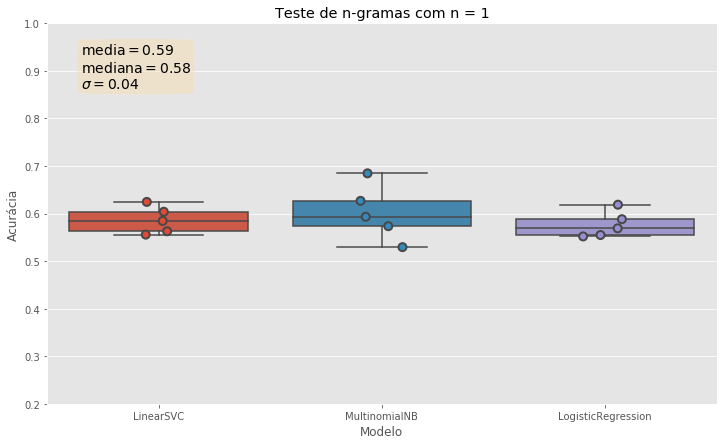

Algoritmos ordenados por ordem de acurácia média

Modelo
MultinomialNB         0.601415
LinearSVC             0.586234
LogisticRegression    0.576468
Name: Acurácia, dtype: float64


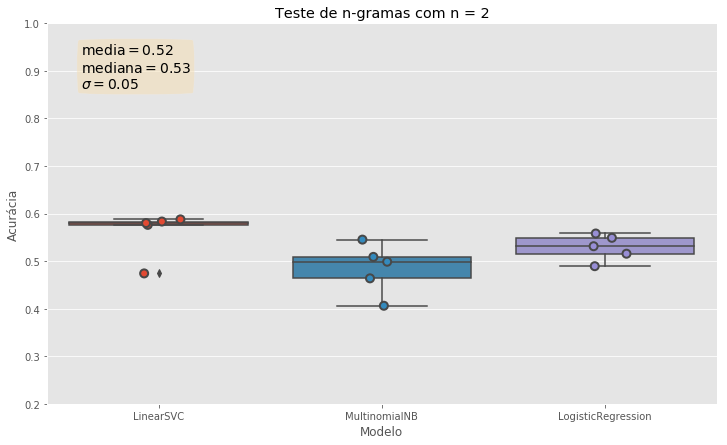

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC             0.560240
LogisticRegression    0.528637
MultinomialNB         0.484526
Name: Acurácia, dtype: float64


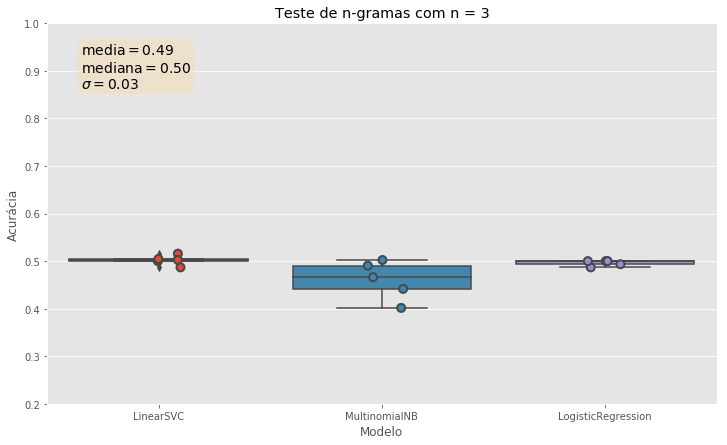

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC             0.501883
LogisticRegression    0.496053
MultinomialNB         0.460415
Name: Acurácia, dtype: float64


In [10]:
ngrams = [1, 2, 3]

for ngram in ngrams:

    vectorizer = CountVectorizer(
        analyzer = 'word',
        lowercase = False,
        stop_words = stopwords,
        ngram_range=(ngram, ngram)
    )

    features = vectorizer.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acurácia'])
    
    mean = cv_df['Acurácia'].mean()
    sigma = cv_df['Acurácia'].std()
    median = cv_df['Acurácia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acurácia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acurácia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # Propriedades do matplotlib.patch.Patch
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # Colocando dados no canto superior esquerdo
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acurácia média')
    print()
    print(cv_df.groupby('Modelo').Acurácia.mean().sort_values(ascending=False))

Com a análise para uni, bi e tri-gramas fica claro que optar por unigramas parece uma opção mais razoável quando nos baseamos na acurácia média.

# Teste dos algoritmos com o modelo tf-idf

Utilizando unigramas, bigramas e trigramas.
Teste de 4 algoritmos diferentes para a classificação: utiliza tf-idf e validação cruzada.

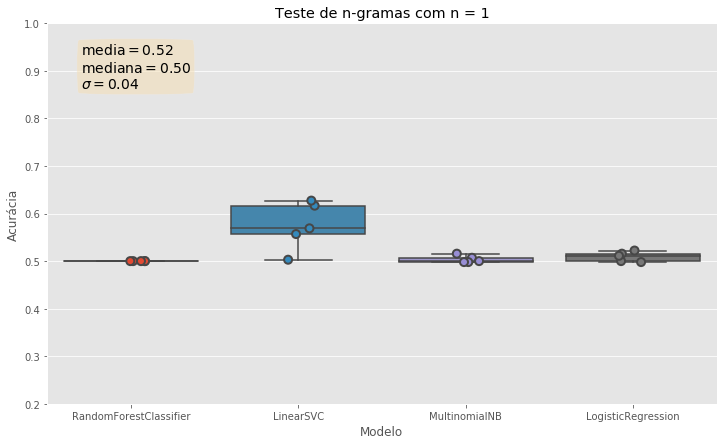

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC                 0.574480
LogisticRegression        0.509386
MultinomialNB             0.503713
RandomForestClassifier    0.500000
Name: Acurácia, dtype: float64


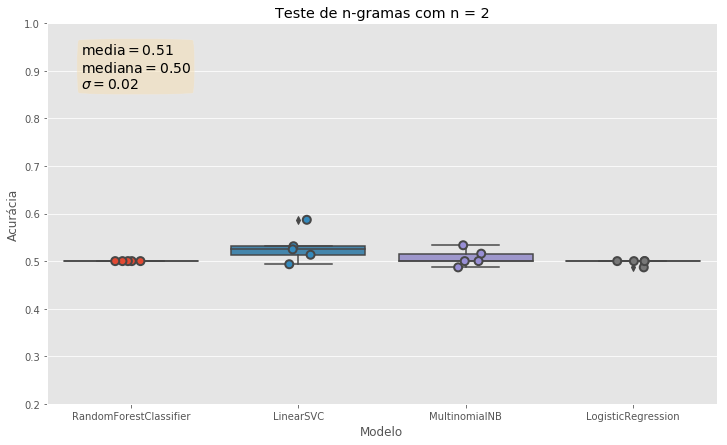

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC                 0.529918
MultinomialNB             0.507164
RandomForestClassifier    0.500000
LogisticRegression        0.497368
Name: Acurácia, dtype: float64


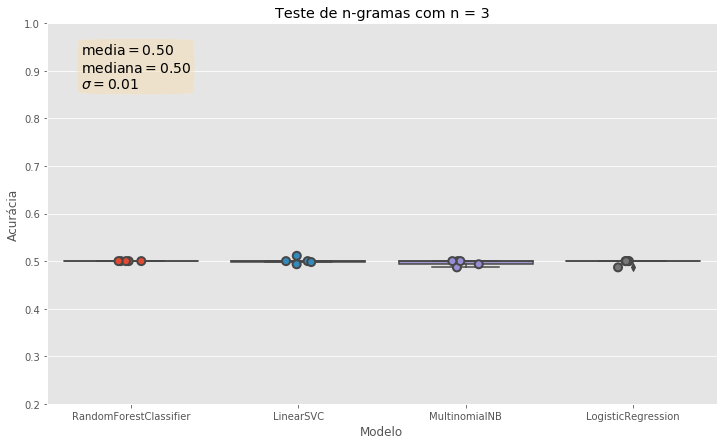

Algoritmos ordenados por ordem de acurácia média

Modelo
LinearSVC                 0.500497
RandomForestClassifier    0.500000
LogisticRegression        0.497368
MultinomialNB             0.496053
Name: Acurácia, dtype: float64


In [11]:
ngrams = [1, 2, 3]

for ngram in ngrams:

    tvec = TfidfVectorizer(analyzer='word',
                           stop_words=stopwords, 
                           ngram_range=(ngram, ngram)
    )

    features = tvec.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels

    models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acurácia'])
    
    mean = cv_df['Acurácia'].mean()
    sigma = cv_df['Acurácia'].std()
    median = cv_df['Acurácia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acurácia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acurácia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acurácia média')
    print()
    print(cv_df.groupby('Modelo').Acurácia.mean().sort_values(ascending=False))



## Teste de performance dos algoritmos utilizando oversampling

In [12]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(ngram, ngram)
)

features = vectorizer.fit_transform(clean_data)
features_nd = features.toarray()

features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

print('Original train dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

features, labels = ros.fit_resample(X_train, y_train)

print('Resampled whole dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

print('New train dataset shape %s' % Counter(y_train))

Original train dataset shape Counter({0: 379, 1: 225})
Resampled whole dataset shape Counter({0: 379, 1: 379})
New train dataset shape Counter({1: 265, 0: 265})


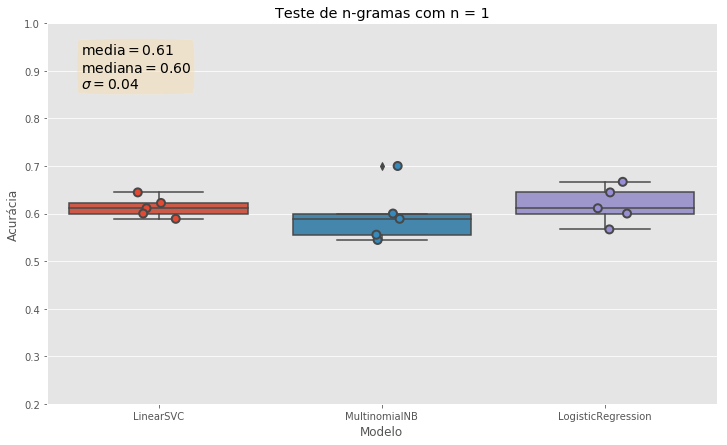

Algoritmos ordenados por ordem de acurácia média

Modelo
LogisticRegression    0.617778
LinearSVC             0.613333
MultinomialNB         0.597778
Name: Acurácia, dtype: float64


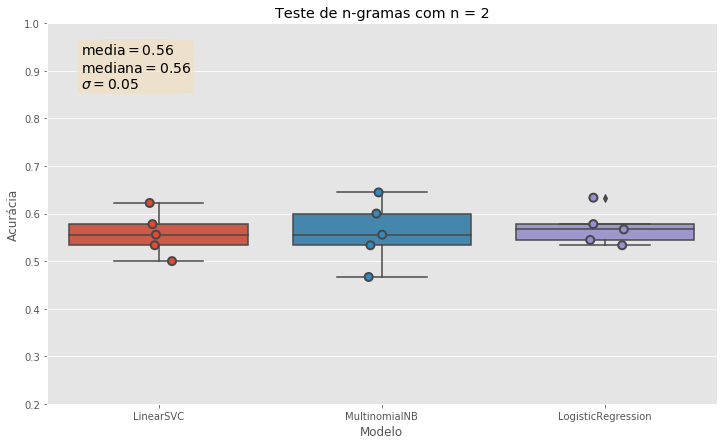

Algoritmos ordenados por ordem de acurácia média

Modelo
LogisticRegression    0.571111
MultinomialNB         0.560000
LinearSVC             0.557778
Name: Acurácia, dtype: float64


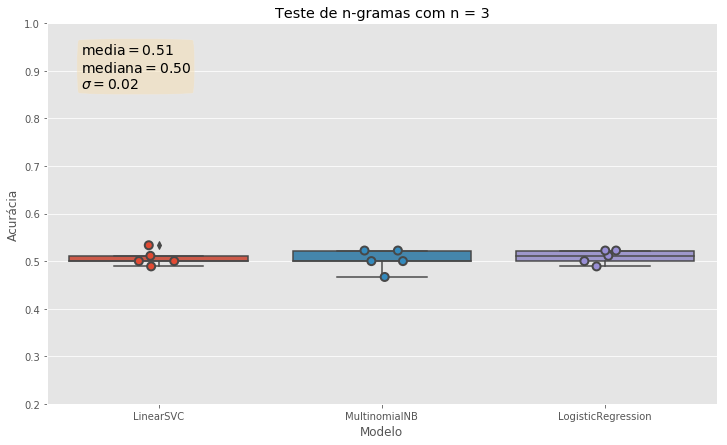

Algoritmos ordenados por ordem de acurácia média

Modelo
LogisticRegression    0.508889
LinearSVC             0.506667
MultinomialNB         0.502222
Name: Acurácia, dtype: float64


In [13]:
ngrams = [1, 2, 3]
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
    
for ngram in ngrams:

    vectorizer = CountVectorizer(
        analyzer = 'word',
        lowercase = False,
        stop_words = stopwords,
        ngram_range=(ngram, ngram)
    )

    features = vectorizer.fit_transform(clean_data)
    features_nd = features.toarray()

    features = features_nd
    labels = data_labels
    
    features, labels = rus.fit_resample(features, labels)

    models = [
        LinearSVC(),
        MultinomialNB(),
        LogisticRegression(random_state=0),
    ]

    CV = 5
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='recall_macro', cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['Modelo', 'fold_idx', 'Acurácia'])
    
    mean = cv_df['Acurácia'].mean()
    sigma = cv_df['Acurácia'].std()
    median = cv_df['Acurácia'].median()
    
    # Plot
    fig, ax = plt.subplots(1)

    sns.boxplot(x='Modelo', y='Acurácia', data=cv_df)
    sns.stripplot(x='Modelo', y='Acurácia', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

    textstr = '$\mathrm{media}=%.2f$\n$\mathrm{mediana}=%.2f$\n$\sigma=%.2f$'%(mean, median, sigma)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round4', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    
    axes = plt.gca()
    axes.set_ylim([0.2,1.0])
    
    title = 'Teste de n-gramas com n = ' + str(ngram)
    
    plt.title(title)
    plt.show()

    print('Algoritmos ordenados por ordem de acurácia média')
    print()
    print(cv_df.groupby('Modelo').Acurácia.mean().sort_values(ascending=False))

## Tunando SVM

Agora vamos tentar tunar os parâmetros do SVM linear.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.3
)


In [15]:
model = SVC()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.45      1.00      0.62        61

   micro avg       0.45      0.45      0.45       135
   macro avg       0.23      0.50      0.31       135
weighted avg       0.20      0.45      0.28       135

[[ 0 74]
 [ 0 61]]


In [16]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [17]:
grid = GridSearchCV(SVC(),param_grid,refit = True)

In [18]:
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 4, 8, 10], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid.best_params_

{'C': 8, 'gamma': 0.1, 'kernel': 'rbf'}

In [20]:
predic = grid.predict(X_test)
best_svm = grid

In [21]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54        74
           1       0.52      0.70      0.60        61

   micro avg       0.57      0.57      0.57       135
   macro avg       0.59      0.58      0.57       135
weighted avg       0.59      0.57      0.57       135

[[34 40]
 [18 43]]


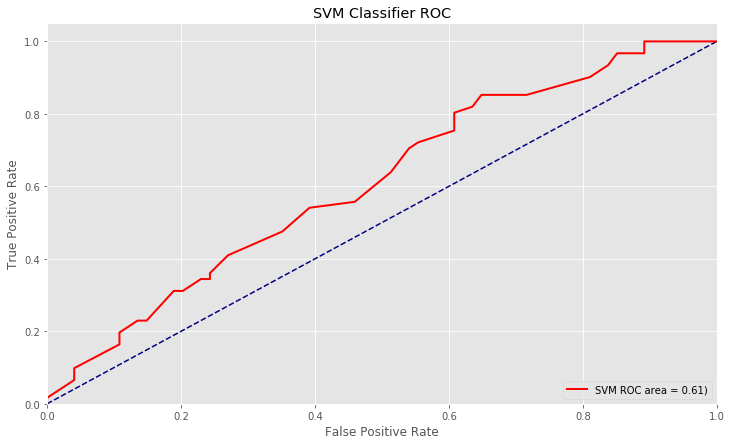

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rbf_svc = SVC(kernel='rbf', gamma=1, C=2,probability=True)
rbf_svc_fitted = rbf_svc.fit(X_train, y_train)
predictedprobSVC = rbf_svc_fitted.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

## Tunando logit

In [23]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train,y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [24]:
# Predict target vector
predic = best_model.predict(X_test)
best_logit = best_model

In [25]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.45      1.00      0.62        61

   micro avg       0.45      0.45      0.45       135
   macro avg       0.23      0.50      0.31       135
weighted avg       0.20      0.45      0.28       135

[[ 0 74]
 [ 0 61]]


# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [26]:
nb = MultinomialNB()
nb = nb.fit(X_train,y_train)

In [27]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.46      1.00      0.63        61

   micro avg       0.46      0.46      0.46       135
   macro avg       0.73      0.51      0.33       135
weighted avg       0.75      0.46      0.30       135

[[ 1 73]
 [ 0 61]]


In [28]:
best_nb = nb

# Em resumo

Estes são os resultados para os melhores classificadores:

In [29]:
predic = best_logit.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.45      1.00      0.62        61

   micro avg       0.45      0.45      0.45       135
   macro avg       0.23      0.50      0.31       135
weighted avg       0.20      0.45      0.28       135

[[ 0 74]
 [ 0 61]]


In [30]:
predic = best_svm.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54        74
           1       0.52      0.70      0.60        61

   micro avg       0.57      0.57      0.57       135
   macro avg       0.59      0.58      0.57       135
weighted avg       0.59      0.57      0.57       135

[[34 40]
 [18 43]]


In [31]:
predic = best_nb.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.46      1.00      0.63        61

   micro avg       0.46      0.46      0.46       135
   macro avg       0.73      0.51      0.33       135
weighted avg       0.75      0.46      0.30       135

[[ 1 73]
 [ 0 61]]


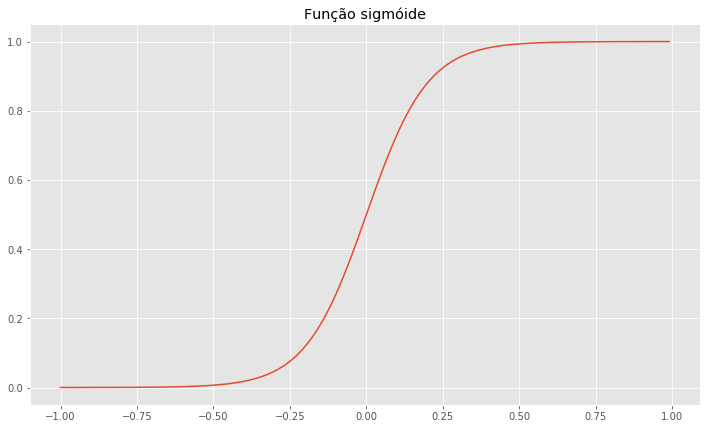

In [32]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item*10)))
    return a

x = np.arange(-1.0, 1.0, 0.01)
sig = sigmoid(x)

plt.title('Função sigmóide')
plt.plot(x,sig)
plt.show()

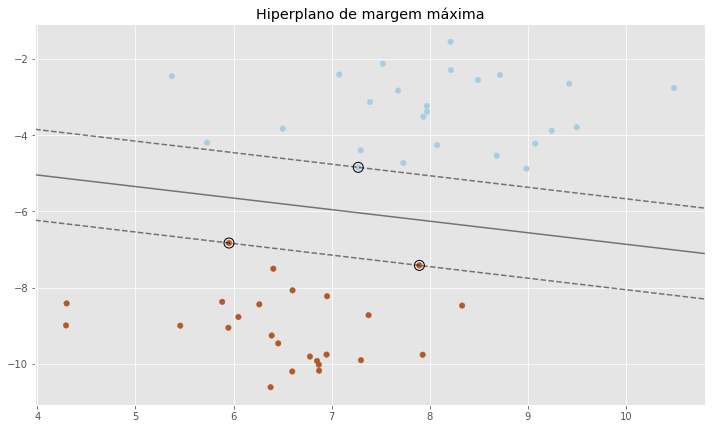

In [33]:

from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('Hiperplano de margem máxima')
plt.show()

# RESAMPLING

Oversampling: aumentando a quantidade de classificações positivas e balanceando o conjunto de testes.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 225, 0: 225})
Resampled dataset shape Counter({1: 225, 0: 225})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

In [37]:
print('New dataset shape %s' % Counter(y_train))

New dataset shape Counter({0: 158, 1: 157})


In [38]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=0)
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 4, 8, 10], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [40]:
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52        67
           1       0.54      0.56      0.55        68

   micro avg       0.53      0.53      0.53       135
   macro avg       0.53      0.53      0.53       135
weighted avg       0.53      0.53      0.53       135

[[34 33]
 [30 38]]


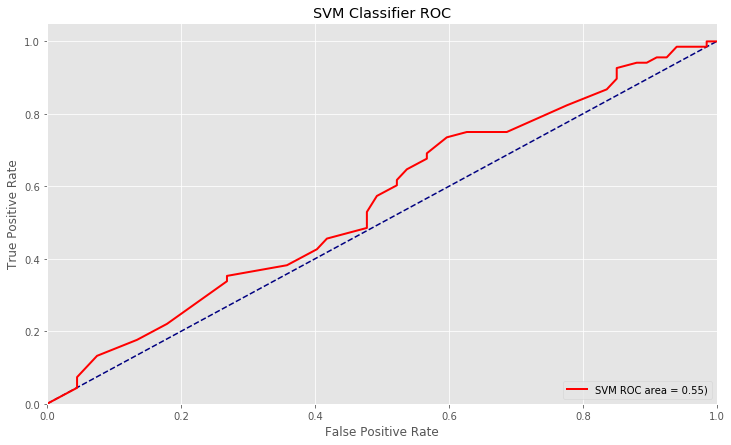

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rbf_svc = SVC(kernel='rbf', gamma=1, C=1,probability=True)
rbf_svc_fitted = rbf_svc.fit(X_train, y_train)
predictedprobSVC = rbf_svc_fitted.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [42]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train,y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [43]:
# Predict target vector
predic = best_model.predict(X_test)
best_logit = best_model
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.51      1.00      0.67        68

   micro avg       0.51      0.51      0.51       135
   macro avg       0.75      0.51      0.35       135
weighted avg       0.75      0.51      0.35       135

[[ 1 66]
 [ 0 68]]


In [45]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


IndexError: too many indices for array

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
nb = MultinomialNB()
nb = nb.fit(X_train,y_train)
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

# UNDERSAMPLING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0
)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomUnderSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X_res, 
        y_res,
        test_size=0.3
)

In [ ]:
print('New dataset shape %s' % Counter(y_train))

## SVM com undersample

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=0)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rbf_svc = SVC(kernel='rbf', gamma=0.1, C=4,probability=True)
rbf_svc_fitted = rbf_svc.fit(X_train, y_train)
predictedprobSVC = rbf_svc_fitted.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

# FINAL!!!!!!!!!!!!!!!!!!!!

# CASO BÁSICO

In [ ]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)
features_nd = features.toarray()

features = features_nd
labels = data_labels

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZAÇÃO DOS ALGORITMOS

### SVM

In [ ]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma é mais rápido 

svm = SVC(kernel='rbf', gamma=1, C=2, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [ ]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

## Tunando logit

In [ ]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [ ]:
# Predict target vector
logit_predicted = best_model.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [ ]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [ ]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [ ]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

## Gráfico com as curvas ROC

In [ ]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Comparação com ROC')

plt.show()

# COM OVERSAMPLING

In [ ]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)

features = features.toarray()
labels = data_labels

ros = RandomOverSampler(random_state=42)
features, labels = ros.fit_resample(features, labels)

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZAÇÃO DOS ALGORITMOS

### SVM

In [ ]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma é mais rápido 

svm = SVC(kernel='rbf', gamma=0.1, C=8, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [ ]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

## Tunando logit

In [ ]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [ ]:
# Predict target vector
logit_predicted = best_model.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [ ]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [ ]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [ ]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

## Gráfico com as curvas ROC

In [ ]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Comparação com ROC')

plt.show()

Para o caso utilizando oversampling, Naive Bayes parece é o que performa melhor observando a área sobre a curva de recepção dos classificadores.

# COM UNDERSAMPLING

In [ ]:
df = pd.read_csv('tweets_classificados.csv')

data = []
clean_data = []
data_labels = []

df['clean_tweet'] = df.apply(clean, args=(emojistring,), axis=1)

for index, row in df.iterrows():
    if row['review'] == 1:
        data_labels.append(1)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    elif row['review'] == -1:
        data_labels.append(0)
        data.append(row['tweet'])
        clean_data.append(row['clean_tweet'])
    else:
        pass   

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    stop_words = stopwords,
    ngram_range=(1, 1)
)

features = vectorizer.fit_transform(clean_data)

features = features.toarray()
labels = data_labels

rus = RandomUnderSampler(random_state=42)
features, labels = rus.fit_resample(features, labels)

X_train, X_test, y_train, y_test = train_test_split(
        features, 
        labels,
        test_size=0.25
)

## OTIMIZAÇÃO DOS ALGORITMOS

### SVM

In [ ]:
param_grid = {'C':[1,2,4,8,10],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
# Agora instanciamos outro SVM usando os dados do grid search para obter a curva ROC e o valor AUC
# Dessa forma é mais rápido 

svm = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)
svm_fitted = svm.fit(X_train, y_train)
predictedprobSVM = svm_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, predictedprobSVM[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [ ]:
svm_predicted = svm_fitted.predict(X_test)

print(classification_report(y_test, svm_predicted))
print(confusion_matrix(y_test, svm_predicted))

## Tunando logit

In [ ]:
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logit_fitted = clf.fit(X_train,y_train)

# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
predictedproblogit = logit_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, predictedproblogit[:,1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

In [ ]:
# Predict target vector
logit_predicted = best_model.predict(X_test)
print(classification_report(y_test, logit_predicted))
# print(confusion_matrix(y_test, logit_predicted))

# Naive Bayes

Naive Bayes não pode ser tunado pois não tem hiperparâmetros, usamos então o mesmo testado anteriormente.

In [ ]:
nb = MultinomialNB()
nb_fitted = nb.fit(X_train, y_train)

In [ ]:
predictedprobnb = nb_fitted.predict_proba(X_test)

# GET ROC DATA
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, predictedprobnb[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [ ]:
predic = nb.predict(X_test)
print(classification_report(y_test,predic))
# print(confusion_matrix(y_test, predic))

## Gráfico com as curvas ROC

In [ ]:
# Grafico final
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logit, tpr_logit, color='green', lw=2, label='Logit ROC area = %0.2f)' % roc_auc_logit)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='NB ROC area = %0.2f)' % roc_auc_nb)

plt.legend(loc="lower right")
plt.title('Comparação com ROC')

plt.show()